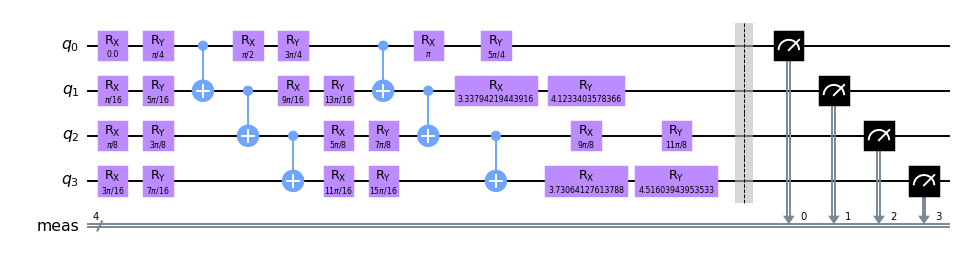

In [1]:
import numpy as np
from qiskit.circuit.library import EfficientSU2
from IPython.display import display

num_qubits = 4
circuit = EfficientSU2(
    num_qubits=num_qubits,
    reps=2,
    entanglement="linear",
    su2_gates=["rx", "ry"],
)
circuit.measure_all()
circuit = circuit.decompose()

params = [(np.pi * i) / 16 for i in range(len(circuit.parameters))]
circuit = circuit.bind_parameters(params)

circuit.draw(output="mpl", scale=0.7)

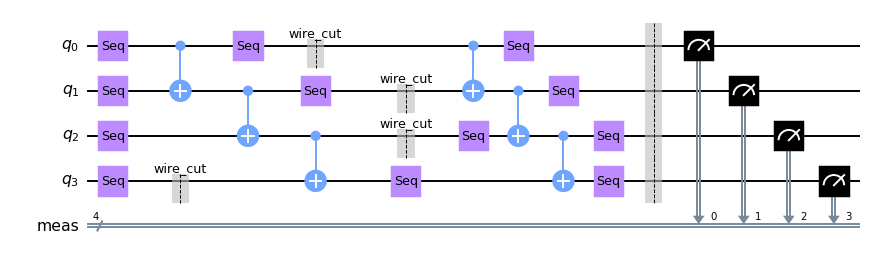

In [11]:
from qvm.cut_library.bisection import bisect_wire, bisect_gate
from qvm.cut_library.util import compact_unary_gates
from qiskit.visualization import dag_drawer
from qiskit.converters import circuit_to_dag

import networkx as nx

cut_circ = bisect_wire(compact_unary_gates(circuit))
cut_circ.draw(output="mpl", scale=0.7)

# nx.draw(circuit_to_dag(circuit))
# dag = circuit_to_dag(circuit)
# dag_drawer(dag, scale=0.7)
# circuit = gate_bisection(circuit)
# circuit.draw(output="mpl", scale=0.7)

# from qvm.cut_library.util import extract_fragments

# circuits = extract_fragments(circuit)
# for circ in circuits.values():
#     display(circ.draw('mpl'))

In [3]:
from qvm.virtualizer import GateVirtualizer
from qvm.

virtualizer = GateVirtualizer(circuit)
insts = virtualizer.instantiations()
for inst in insts[:3]:
    display(inst.decompose().draw(output="mpl", scale=0.5))

SyntaxError: invalid syntax (2798389150.py, line 2)